# Project proposal (Title needed)
### Importing the packages and libraries

In [2]:
install.packages("cowplot")
install.packages("kknn")
install.packages("GGally")
install.packages('tidyverse')
library(kknn)
library(GGally)


The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmpc41Qft/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmpc41Qft/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmpc41Qft/downloaded_packages

The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmpc41Qft/downloaded_packages


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
#import libraries
install.packages("themis")
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(readxl)
library(ggplot2)
library(cowplot)
install.packages("infer")


The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmpc41Qft/downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp





The downloaded binary packages are in
	/var/folders/fb/5nf2l6vx4tj8839ndlppjshw0000gn/T//Rtmpc41Qft/downloaded_packages


## Introduction
Enhancing educational systems requires a deep comprehension of methods to assist children and teenagers in learning more efficiently and engaging thoroughly in their education. An approach to achieve this could be fostering robust connections between students and teachers. This is based on the idea that students benefit greatly when they perceive their teachers as being invested in them, demonstrating that the educators are aware of and care about their students(Klem et al., 2004, pg. 1). Moreover, according to Klem et al.(2004), students who received additional support from school felt more engaged and, as a result, showed a higher level of academic performance. To gather more information around this subject, we are analyzing data from UC Irivne Machine Learning Repository of 649 Portuguese secondary schoolers to investigate whether students who received extra support from school have on average a higher mean final grade than students who did not, along with testing whether two groups have equal standard deviations of the mean.

### Dataset background
The data attributes include student grades, demographic, social and school-related features. In our study, we focus on the variables of "G3 (final grade)" and “schoolsup (extra educational support)”. We want to use this sample to infer the parameter of all high-school students in Alentejo region of Portuguese. 

## Methods and Result
### Import dataset

In [4]:
studenturl<- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
temp <- tempfile()
download.file(studenturl,temp)
studentzip <- unzip(temp, "student.zip")
studentfile <- unzip(studentzip,"student-por.csv")
student <- read_csv2(studentfile, col_names = TRUE)

student

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,F,18,U,GT3,T,1,1,other,other,⋯,1,1,1,1,1,5,6,11,12,9
MS,M,17,U,LE3,T,3,1,services,services,⋯,2,4,5,3,4,2,6,10,10,10
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,4,10,11,11


<em>Table 1: Student Performance's raw dataset</em>

### Clean and wrangle dataset

In [5]:
#Select variables that is needed for the dataset, along with filtering out any data points that is not available
clean_student <- student %>%
                  select(schoolsup,G3)%>%
                  filter(!is.na(schoolsup),!is.na(G3))
clean_student

schoolsup,G3
<chr>,<dbl>
yes,11
no,11
yes,12
⋮,⋮
no,9
no,10
no,11


### Preliminary result

In [6]:
#number of student receive school support and number of students who don't
schoolsup_num <- clean_student %>%
                 group_by(schoolsup)%>%
                 summarize(n= n())
schoolsup_num

schoolsup,n
<chr>,<int>
no,581
yes,68


In [7]:
summary_student <- clean_student %>%
                   group_by(schoolsup)%>%
                   summarize(mean_final_grade = mean(G3),
                            sd = sd(G3),
                            n = n())
summary_student

schoolsup,mean_final_grade,sd,n
<chr>,<dbl>,<dbl>,<int>
no,11.97935,3.316040,581
yes,11.27941,2.304088,68


<em>Table 2: Statistical summary of student's final grade</em>

### Plot the raw data

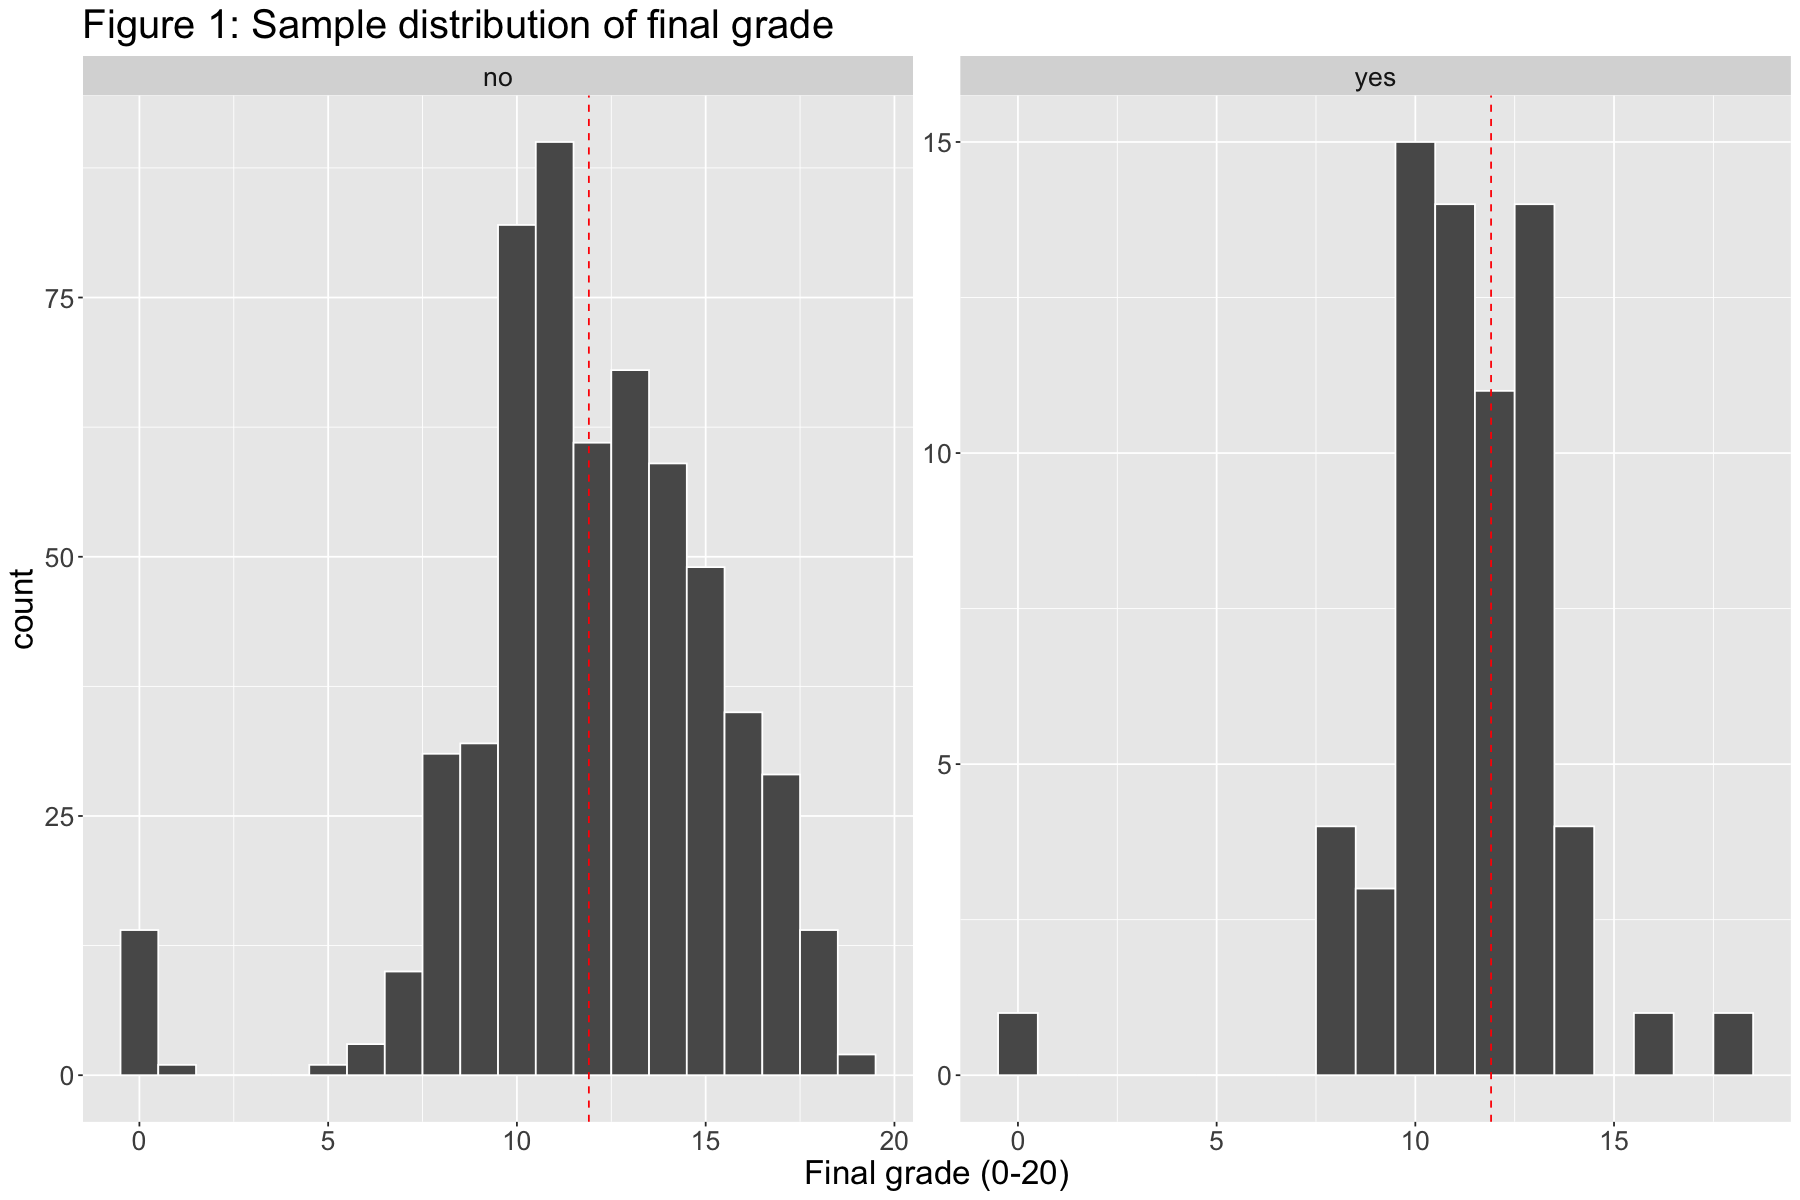

In [8]:
options(repr.plot.width = 15, repr.plot.height =10)
sample_distribution <- clean_student %>%
                       ggplot()+
                       geom_histogram(aes(G3),binwidth=1,,color="white")+
                       geom_vline(aes(xintercept=mean(G3)), color="red",
             linetype="dashed")+
                       ggtitle("Figure 1: Sample distribution of final grade")+
                       xlab("Final grade (0-20)")+
                       facet_wrap(vars(schoolsup),scales = "free")+
                       theme(text = element_text(size = 20))
sample_distribution

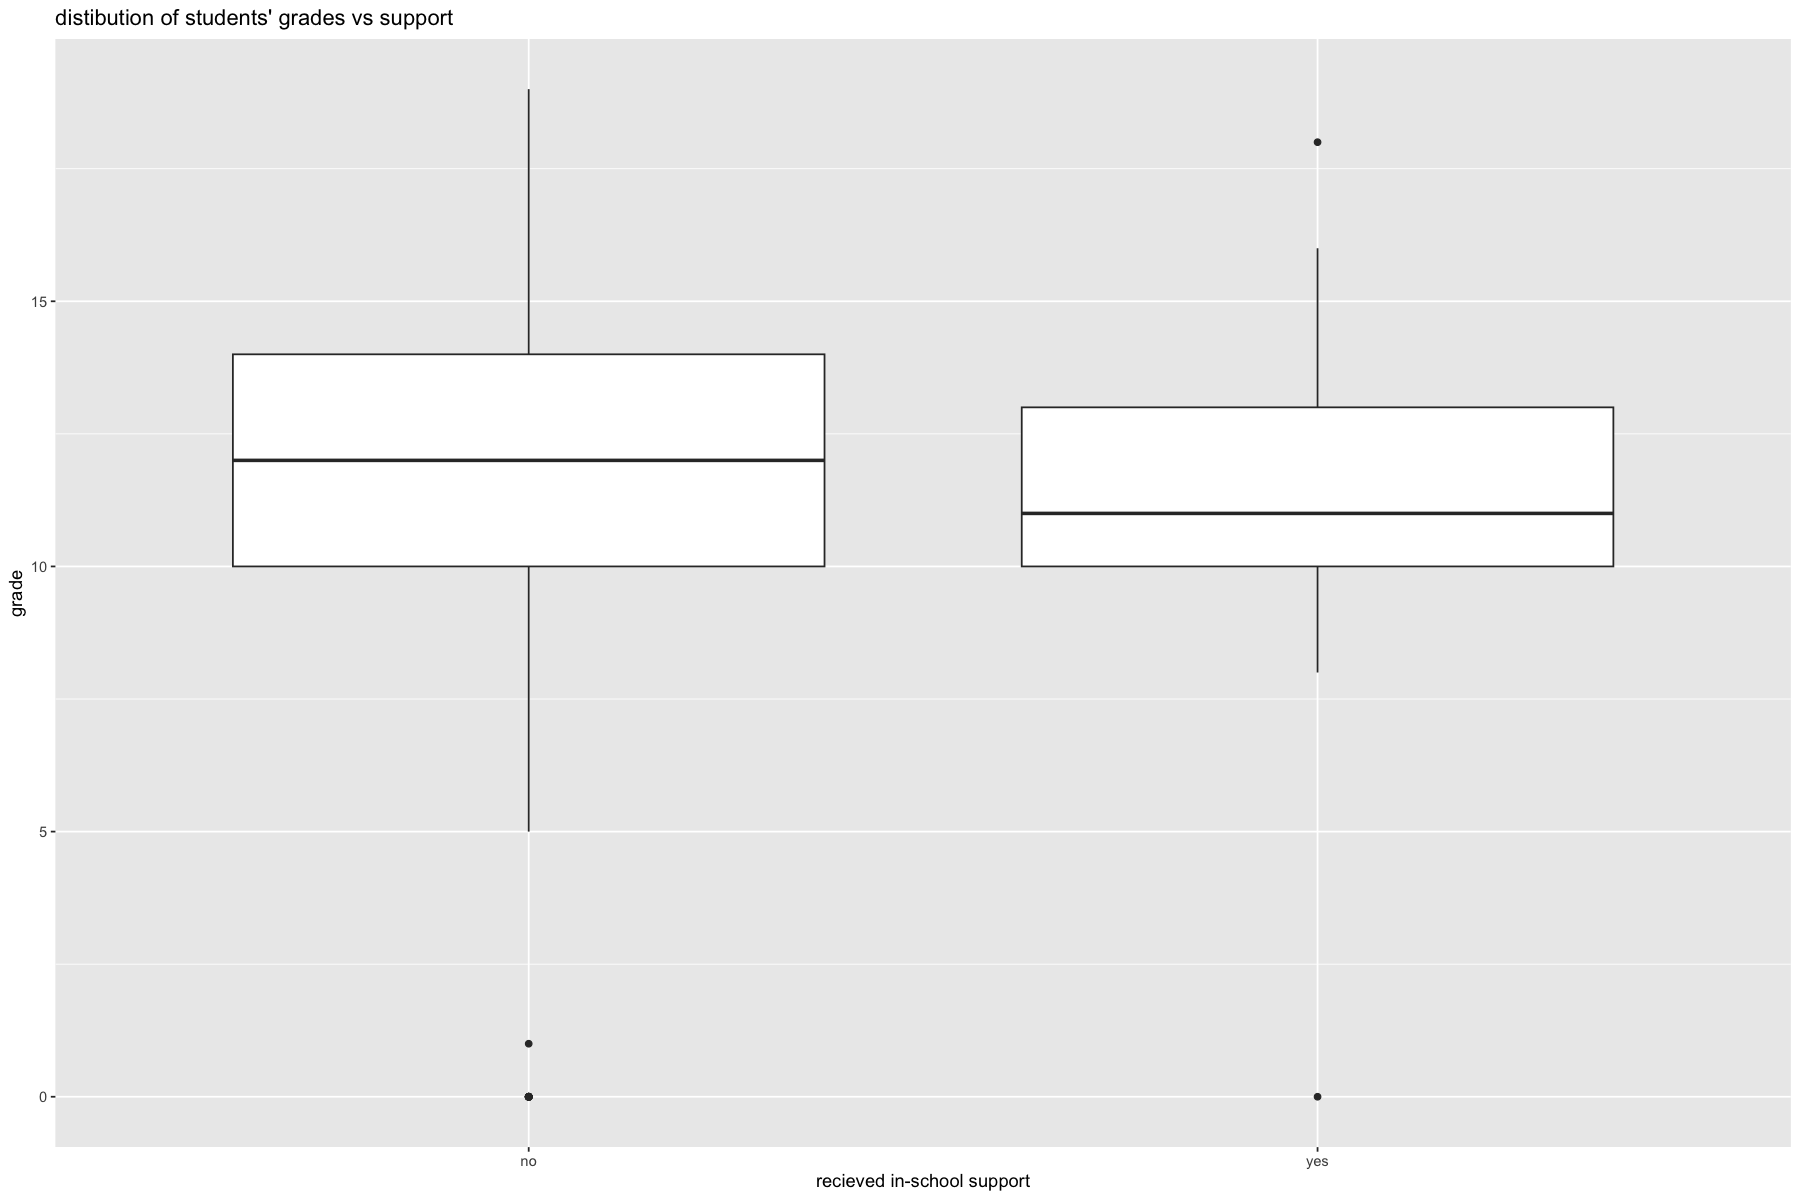

In [9]:
grades_boxplot <- clean_student |>
    ggplot(aes(x = schoolsup,y = G3)) +
    geom_boxplot() +
    labs(x = "recieved in-school support", y = "grade", title = "distibution of students' grades vs support")

grades_boxplot

## Method

   The dataset was collected at two random public schools from the Alentejo region of Portuguese by using school reports and questionnaires. Since the sample size is relatively large (n=649), and there is no bias in selecting schools. Then, we can say the sample is representative of the population of Portuguese student in the Alentejo region. Any result based on the sample can generalize to the population, and the point estimate is a “good guess” of the unknown population parameter. Thus, we can conclude that the report is trustworthy.
   
   While briefly viewing the sample distribution of grades between the two groups, we can see that the mean final grade of students who receive no extra educational support from the school is slightly higher than those who receive extra support from the school. However. Due to the difference in size of each group and standard deviation; we cannot conclude that there are differences between the two groups in the population. 
   Our hypothesis tests as followed:
   1. Hypothesis testing for difference in mean\
    - Null Hypothesis: "The mean final grade of students receiving extra support from school" = "The mean final grade of students not receiving extra support from school"\
    - Alternative Hypothesis: "The mean final grade of students receiving extra support from school" is larger to "The mean final grade of students not receiving extra support from school"
    
   2. Hypothesis testing for standard deviation\
    - Null hypothesis: "The standard deviation of mean final final grade of students receiving extra support from school" = "The standard deviation of mean final grade of students not receiving extra support from school"\
    - Alternative Hypothesis: "The standard deviation of mean final grade of students receiving extra support from school" is larger to "The standard deviation of mean final grade of students not receiving extra support from school"
   
We will select a significance level to be: $\alpha = 0.05$

   The Confidence interval can be built using the CLT or bootstrapping. Both methods work for our dataset. For the CLT method, our samples are approximately normal, and assuming that our sample size is less than 10% of the population. Using the bootstrapping method would also be acceptable, but it would be very computationally expensive for us since our sample size is above 600. Therefore, using the Central Limit Theorem to build the Confidence Interval is preferable in our case 
   
   For hypothesis testing of the mean, we can use $t$-distribution hypothesis testing. Considering the condition for $t$-distribution hypothesis testing, since we don't know whether the difference of mean between the two group is normally distributed, we can use the Central Limit Theorem to apply the $t$-distribution. The conditions of the  
   In order to confirm that we satisfy the condition for the Central Limit, we need to make some assumption:
   1. The sample of the two population is randomly selected
   2. The sample of the two population is independent (i.e the sample size of the two population is larger than 30)
   3. The two sample are independent of each other
   
   Since conditions are satisfied, we can use the CLT to conduct Classical test based on $t$-distribution
   
   In order to enhance the accuracy of our estimates, we can conduct a 95% confidence interval for the standard deviation of the two population, to see where our standard deviation are, and to estimate whether there are overlap between the two population. Since we don't know whether the true standard deviation is normally distributed, and there's no classical formula for confidence interval of the standard deviation, we need to use the bootstrapping method to estimate the confidence interval of the standard deviation of the two population
 
Based on the hypothesis, we expect to find that there is a difference of mean final grade between students with school support and those without school support. 
 
Understanding the relationship between student performance and addition lays the foundation for change and creates new educational strategies (Odden & Archibald, 2001).  Therefore, looking at the difference between mean grades between two categories of students, one can decide whether to allocate more resources like funding or change the current instructional support altogether.  
      
**Future questions:**
- What other factors can be compared to see any substantial differences or trends?
- How can we effectively and efficiently implement ways of improving students’ support from teachers?
     

## Inferential analysis

### Hypothesis testing for the mean

In [10]:
#Finding test-statistic

test_stat <- (summary_student$mean_final_grade[2] - summary_student$mean_final_grade[1]) / sqrt((summary_student$sd[2])^2 /summary_student$n[2] + (summary_student$sd[1])^2 /summary_student$n[1])
test_stat

#finding degrees of freedom 

n_yes <- summary_student$n[2]^2 * (summary_student$n[2] - 1)
n_no <- summary_student$n[1]^2 * (summary_student$n[1] - 1)


degrees <- (summary_student$sd[2]^2 /summary_student$n[2] + summary_student$sd[1]^2 /summary_student$n[1])^2 / (summary_student$sd[2]^4 / n_yes + summary_student$sd[1]^4/ n_no ) 
degrees

#p-value

p_value <- pt(test_stat, df= degrees,lower.tail=FALSE) 
p_value 

[1] -2.247386

[1] 102.7248

[1] 0.9866233

Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


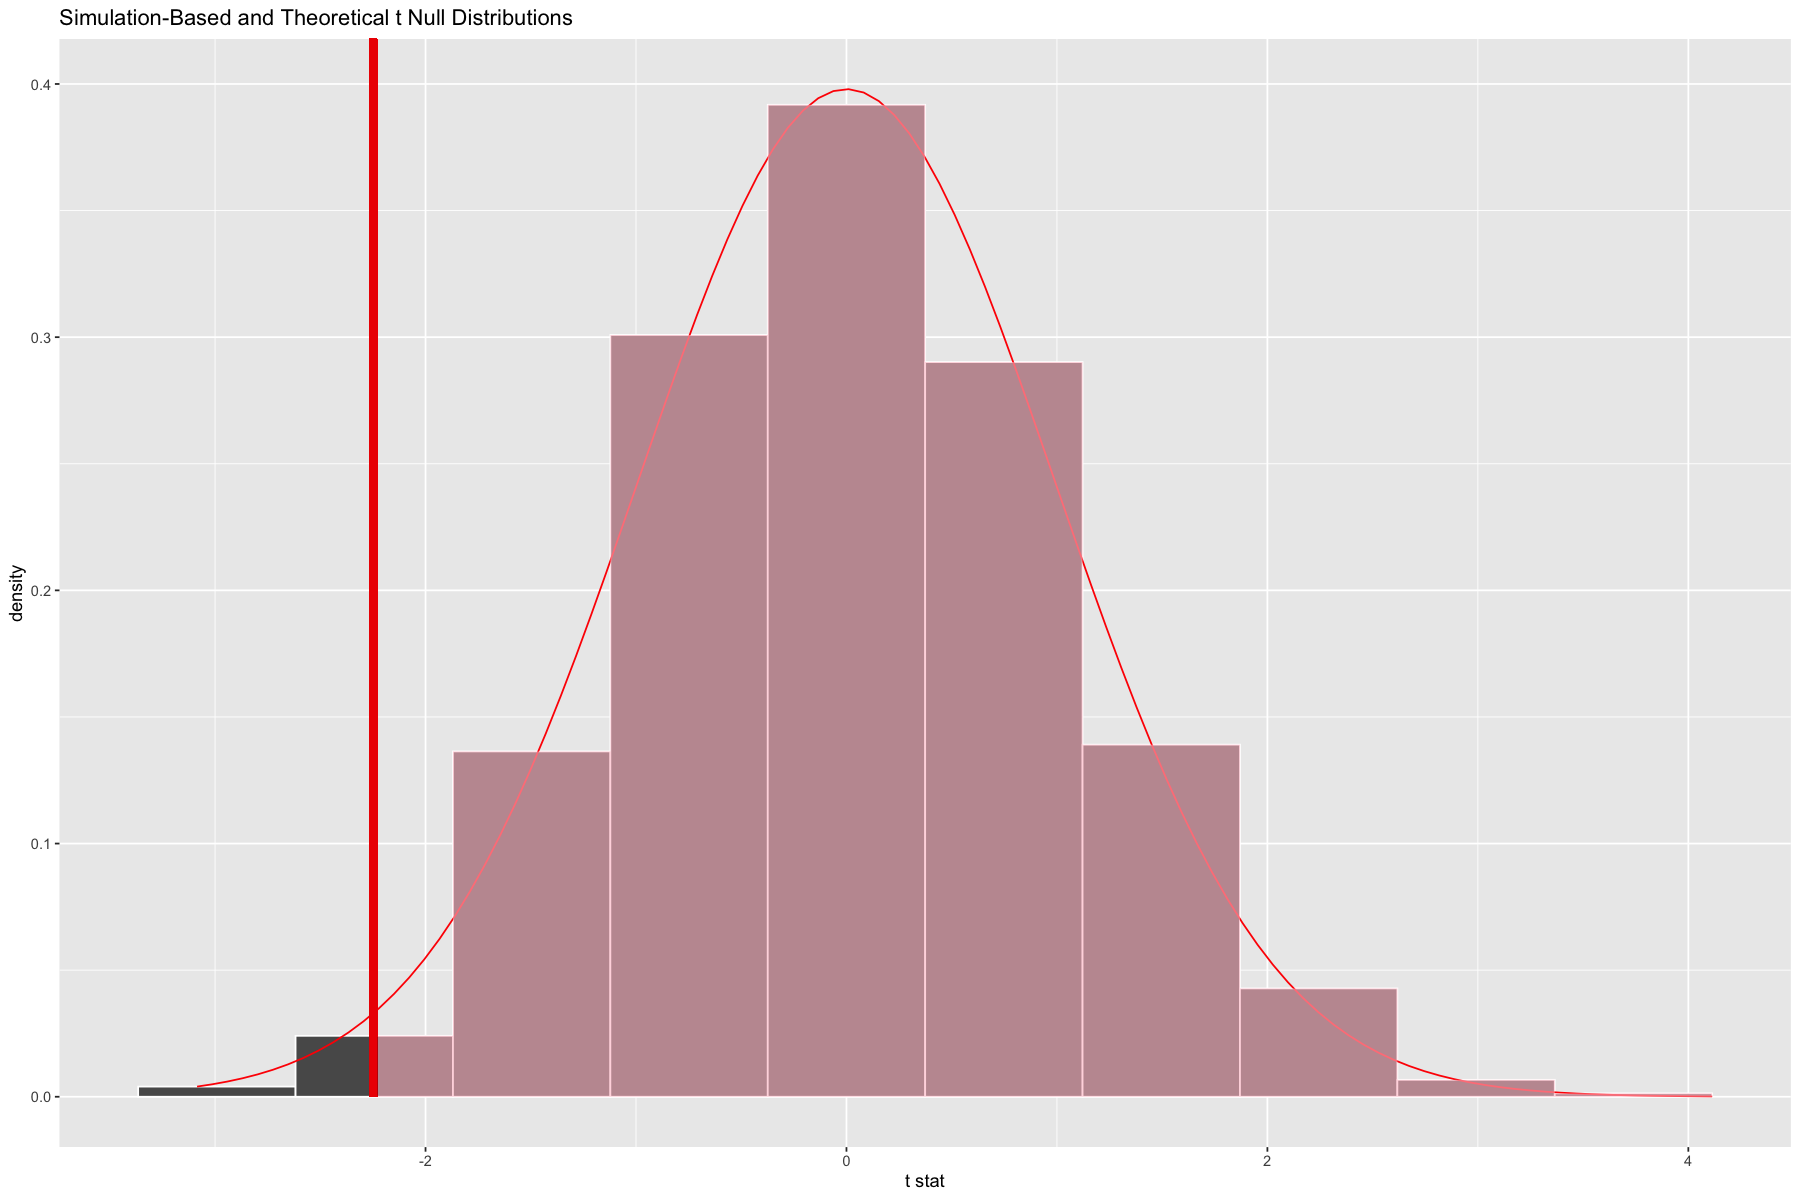

In [11]:
# Construct null distribution of t:
library(infer)
null_distribution <- clean_student %>% 
  specify(formula = G3 ~ schoolsup) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("yes", "no"))

visualization <- null_distribution %>%
  visualize(null_distribution, method = "both", bins = 10, dens_color = "red") +
  shade_p_value(obs_stat = test_stat, direction = "right")
visualization

### Confidence Interval for Standard deviation

lower_ci,upper_ci
<dbl>,<dbl>
1.50707,3.106757


stat
<dbl>
1.765624
2.549424
2.931468
⋮
1.637668
2.320037
2.321598


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


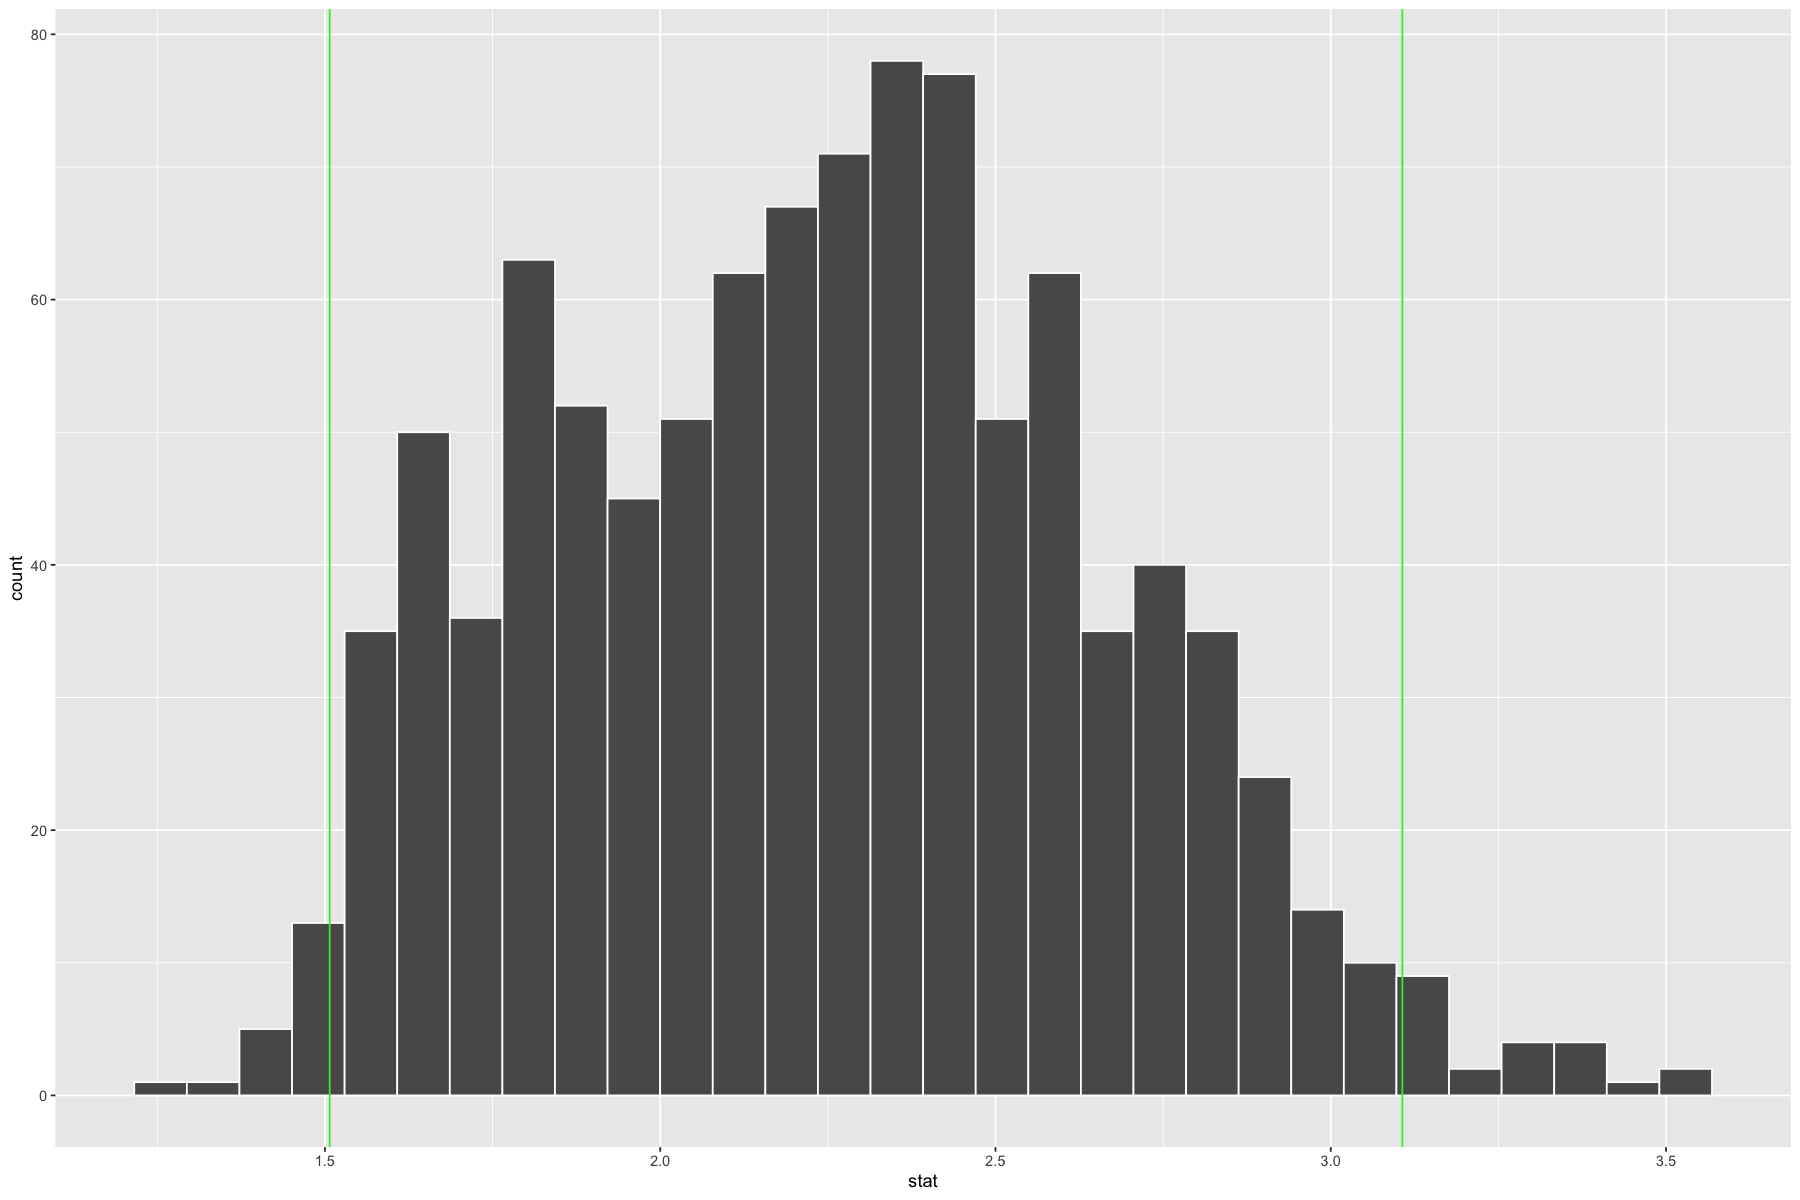

In [12]:
set.seed(2023)
library(infer)
yes_sd_mark_ci <- clean_student %>%
                  filter(schoolsup == "yes")%>%
                  specify(response = G3)%>%
                  generate(reps = 1000, type = "bootstrap")%>%
                  calculate(stat = "sd")%>%
                  get_ci(level = 0.95, type = "percentile")
yes_sd_mark_ci
# Cannot visualize since we don't
yes_mark_ci_dist <- clean_student %>%
                  filter(schoolsup == "yes")%>%
                  specify(response = G3)%>%
                  generate(reps = 1000, type = "bootstrap")
yes_mark_ci_dist <- yes_mark_ci_dist %>%
                    group_by(replicate)%>%
                   summarize(stat = sd(G3))%>%
                   select(stat)
yes_mark_ci_dist
yes_ci_visualize <- yes_mark_ci_dist %>%
                    ggplot(aes(x=stat))+
                    geom_histogram(colour = "white")+
                    geom_vline(xintercept = yes_sd_mark_ci[[1]], colour = "#2fed2f") +
                    geom_vline(xintercept = yes_sd_mark_ci[[2]], colour = "#2fed2f")
yes_ci_visualize

lower_ci,upper_ci
<dbl>,<dbl>
3.009436,3.601518


stat
<dbl>
3.290006
3.178264
3.329948
⋮
3.335970
3.204086
3.439289


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


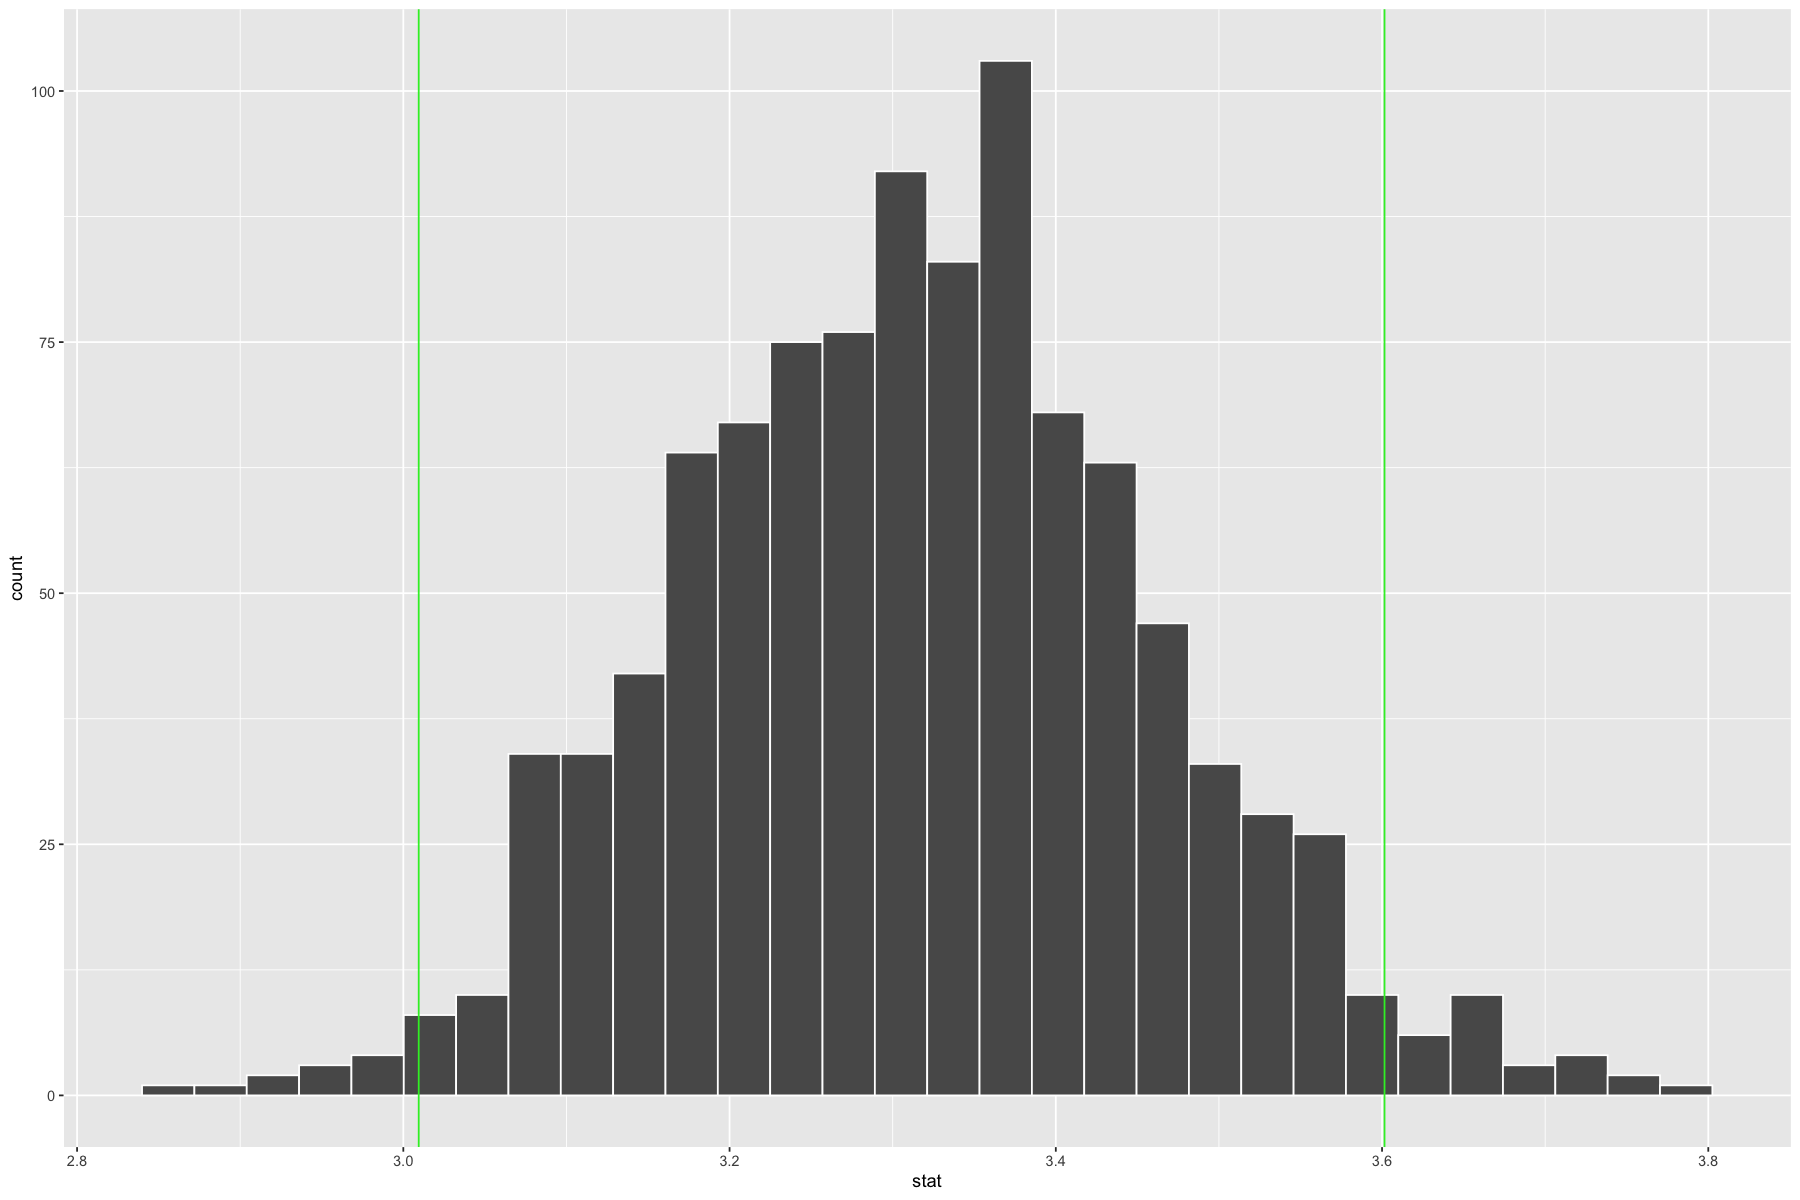

In [13]:
set.seed(2023)
no_sd_mark_ci <- clean_student %>%
                  filter(schoolsup == "no")%>%
                  specify(response = G3)%>%
                  generate(reps = 1000, type = "bootstrap")%>%
                  calculate(stat = "sd")%>%
                  get_ci(level = 0.95, type = "percentile")
no_sd_mark_ci

no_mark_ci_dist <- clean_student %>%
                  filter(schoolsup == "no")%>%
                  specify(response = G3)%>%
                  generate(reps = 1000, type = "bootstrap")

no_mark_ci_dist <- no_mark_ci_dist %>%
                    group_by(replicate)%>%
                   summarize(stat = sd(G3))%>%
                   select(stat)
no_mark_ci_dist
no_ci_visualize <- no_mark_ci_dist %>%
                    ggplot(aes(x=stat))+
                    geom_histogram(colour = "white")+
                    geom_vline(xintercept = no_sd_mark_ci[[1]], colour = "#2fed2f") +
                    geom_vline(xintercept = no_sd_mark_ci[[2]], colour = "#2fed2f")
no_ci_visualize

In [33]:
fail_yes <- clean_student %>%
                 filter(schoolsup == "yes" & G3 < 8)
fail_yes                 
fail_no <- clean_student %>%
                 filter(schoolsup == "no" & G3 < 8)
fail_no

schoolsup,G3
<chr>,<dbl>
yes,0


schoolsup,G3
<chr>,<dbl>
no,7
no,6
no,0
⋮,⋮
no,0
no,0
no,0


## Conducting test hypothesis

References:\
Cortez, P., & Silva, A. (2008). Using data mining to predict secondary school student performance. EUROSIS.

Klem, A. M., & Connell, J. P. (2004). Relationships Matter: Linking Teacher Support to Student Engagement and Achievement. Journal of School Health, 74(7), 262–273. https://doi.org/10.1111/j.1746-1561.2004.tb08283.x

Odden, A., & Archibald, S. (2001). Reallocating Resources: How to Boost Student Achievement Without Asking for More. SAGE Publications. https://books.google.com/books?id=QkZmgMvKoRcC 